### Import Libraries

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
warnings.filterwarnings('ignore')

### Loading Data

In [2]:
# load dataset
dataset = pd.read_csv('Dataset/winequality-red.csv')

### Exploratory Data Analysis

In [3]:
# Shape of the dataset
dataset.shape

(1599, 12)

In [4]:
# First 5 rows of the dataset
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# Check for null values
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
# Statistical Analysis of dataset
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


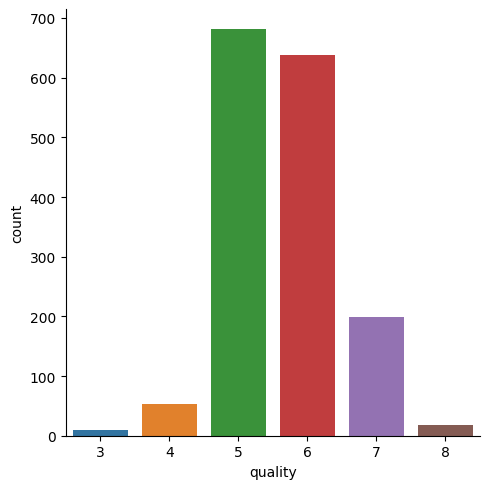

In [7]:
# Numer of values for each quality
sns.catplot(x='quality', data=dataset, kind='count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

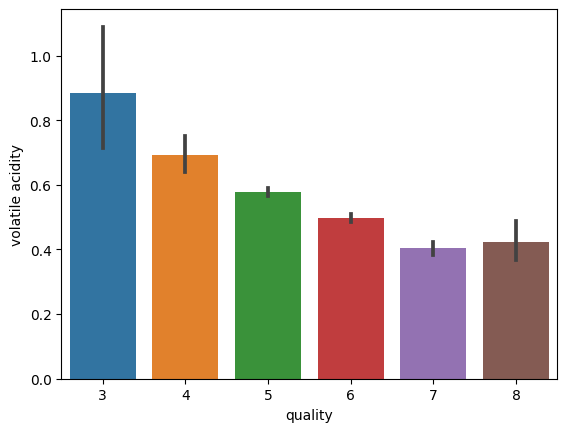

In [8]:
# Correlation between volatile acidity and quality
sns.barplot(x='quality', y='volatile acidity', data=dataset)

<Axes: xlabel='quality', ylabel='citric acid'>

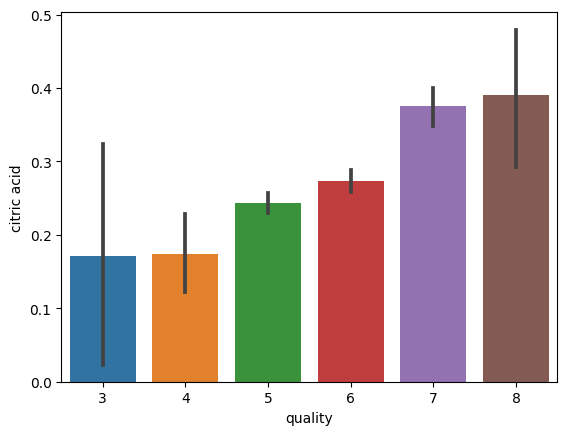

In [9]:
# Correlation between citric acid and quality
sns.barplot(x='quality', y='citric acid', data=dataset)

<Axes: >

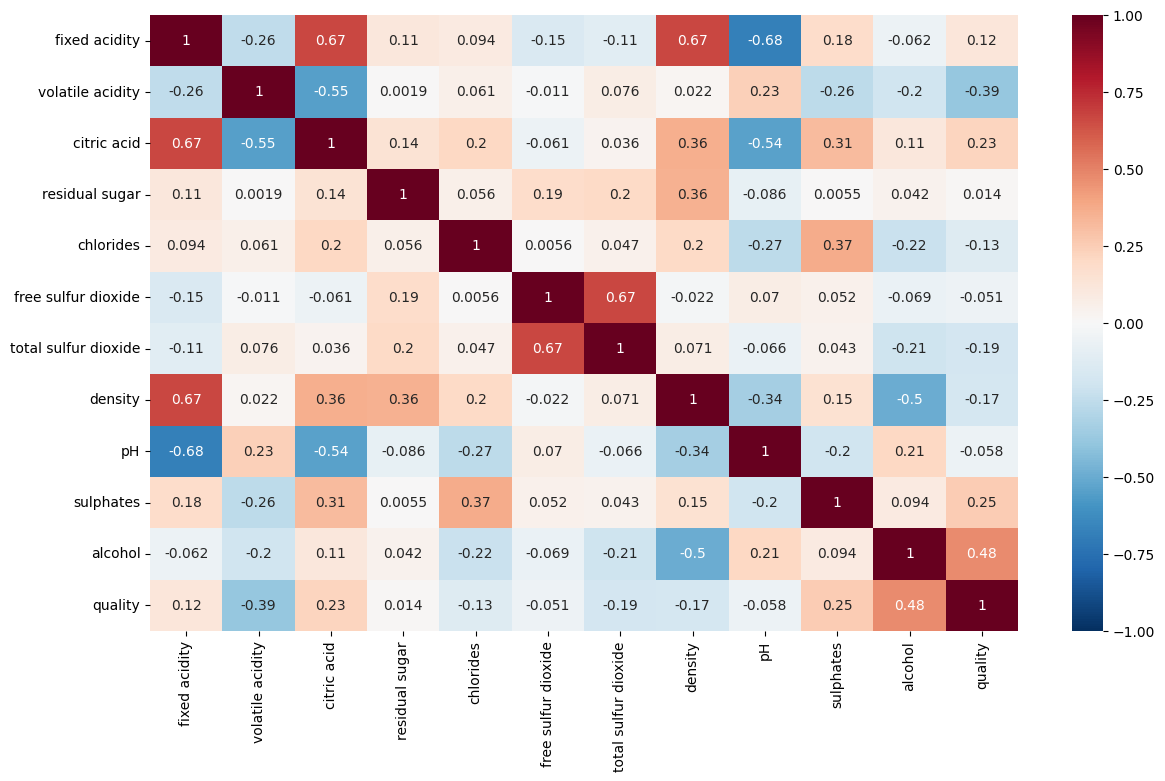

In [10]:
# Correlation between the features
correlation = dataset.corr()
plt.figure(figsize=(14,8))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

### Data Preprocessing

In [11]:
# Create training and testing data
X = dataset.drop('quality', axis=1)
y = dataset['quality'].apply(lambda y_value: 1 if y_value >= 7 else 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1279, 11) (320, 11) (1279,) (320,)


### Model Training:
Random Forest Classifier

In [12]:
# Define the model
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)
X_test_prediction = model.predict(X_test)

In [13]:
# get accuracy of the model
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy * 100, '%')

Accuracy score of test data :  93.125 %


Testing on new Data

In [14]:
# Test on new data
input_data = np.asarray([7.3, 0.65, 0, 1.2, 0.065, 15, 21, 0.9946, 3.39, 0.47, 10.0]).reshape(1, -1)
prediction = model.predict(input_data)
print(prediction)
if prediction[0] == 1:
    print("Good Quality")
else:
    print("Bad Quality")

[1]
Good Quality


In [15]:
# Test on new data
input_data = np.asarray([7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4]).reshape(1,-1)
prediction = model.predict(input_data)
print(prediction)
if prediction[0] == 0:
    print("Bad Quality")
else:
    print("Good Quality")


[0]
Bad Quality
